## Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('/content/dataset.csv', encoding='ISO-8859-1')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


## Preprocessing the dataset

In [4]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [5]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [8]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['SentimentText'], "@[\w]*")

In [ ]:
df.head()

In [9]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O,omg its already O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...


In [10]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0,is so sad for my APL frie...,friend
1,2,0,I missed the New Moon trail...,missed Moon trailer
2,3,1,omg its already 7:30 :O,already
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga sooo gunna been this dentist since supo...
4,5,0,i think mi bf is cheating on me!!! ...,think cheating


In [11]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                             [friend]
1                              [missed, Moon, trailer]
2                                            [already]
3    [Omgaga, sooo, gunna, been, this, dentist, sin...
4                                    [think, cheating]
Name: clean_tweet, dtype: object

In [12]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0                                             [friend]
1                                [miss, moon, trailer]
2                                            [alreadi]
3    [omgaga, sooo, gunna, been, thi, dentist, sinc...
4                                       [think, cheat]
Name: clean_tweet, dtype: object

In [16]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0,is so sad for my APL frie...,friend
1,2,0,I missed the New Moon trail...,miss moon trailer
2,3,1,omg its already 7:30 :O,alreadi
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna been thi dentist sinc supos ...
4,5,0,i think mi bf is cheating on me!!! ...,think cheat


## Exploratory Data Analysis

In [17]:
# !pip install wordcloud

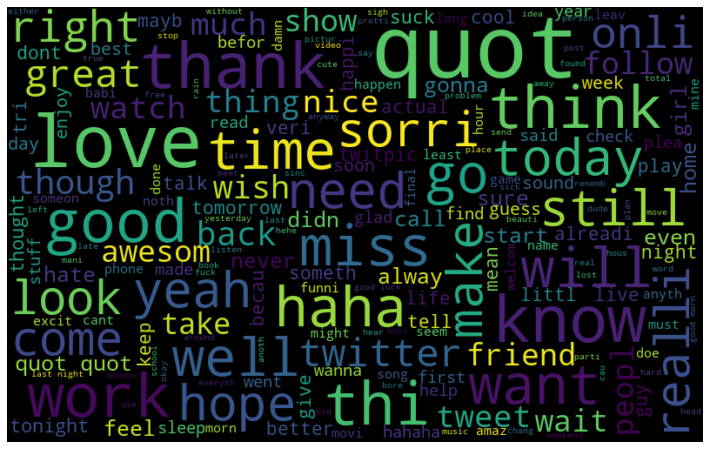

In [18]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

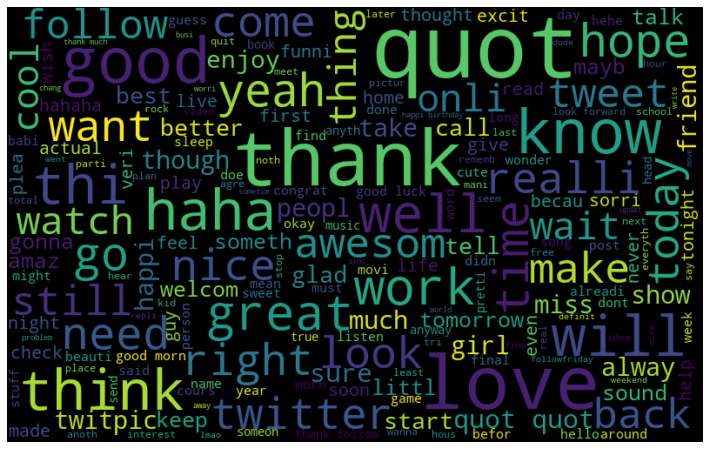

In [36]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

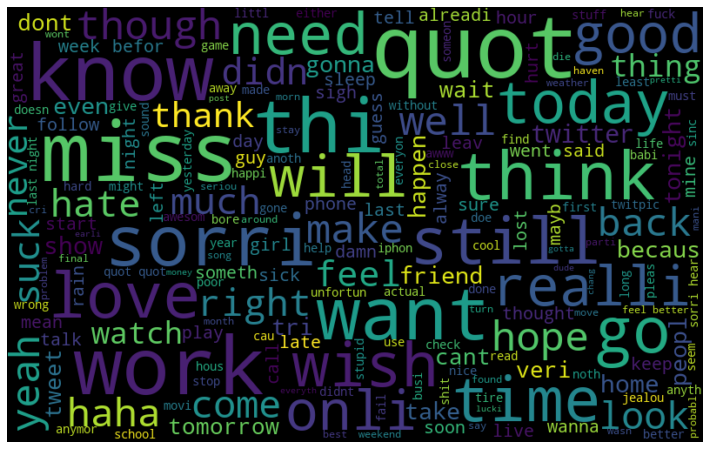

In [21]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [23]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['Sentiment']==1])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['Sentiment']==0])

In [27]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [28]:
ht_positive[:5]

['poemsund', 'video', 'robotpickuplin', 'skydiv', 'andyhurleyday']

In [29]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,poemsund,1
1,video,4
2,robotpickuplin,10
3,skydiv,1
4,andyhurleyday,20


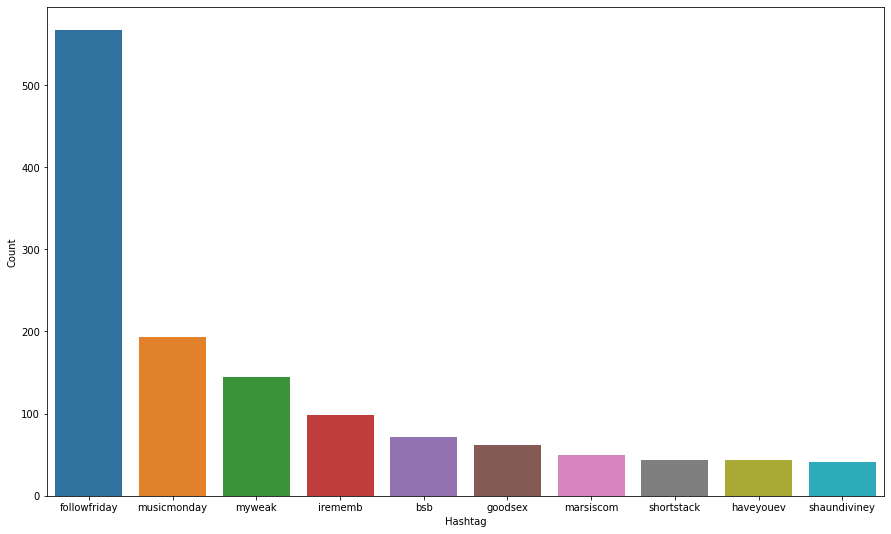

In [30]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [31]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,asylm,11
1,squarespac,95
2,susan,2
3,twenti,2
4,iphon,34


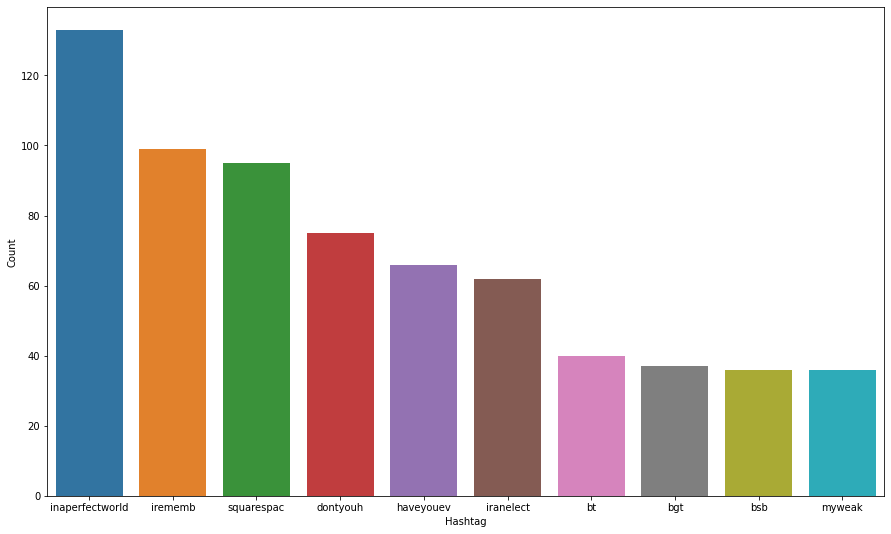

In [32]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Input Split

In [33]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [34]:
# bow[0].toarray()

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Sentiment'], random_state=42, test_size=0.25)

## Model Training

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [39]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.7681728880157173

In [46]:
accuracy_score(y_test,pred)

0.6760940875270022

In [44]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.7656914662731139

In [45]:
accuracy_score(y_test,pred)

0.6760940875270022

In [47]:
pred_prob[0][1] >= 0.3

True